# Tree-based Methods

Tree-based methods can be used to solve regression and classification problems. 

## Decision Trees

A decision tree is a tree structure that partition data points into regions or categories. Each vertex represents a decision to be made. The outgoing edges from a vertex represent possible choices for that decision.

<img src="https://tfbarker.files.wordpress.com/2013/12/tree.png" />
Image from <a href="https://tfbarker.wordpress.com/2013/12/22/datamining/">#</a>

For instance, the figure above illustrates a decision tree model for the Titanic data set from Kaggle. Let us see the number of men vs. women in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/titanic-train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survival State'] = df['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Died')
df['Survival State'].value_counts()

Died        549
Survived    342
Name: Survival State, dtype: int64

We can see that 549 people died while the remaining 342 survived. This means that following histogram is associated with the root node:

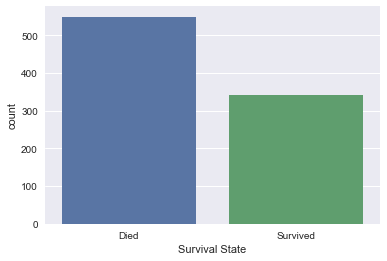

In [5]:
sns.countplot(x='Survival State', order=['Died', 'Survived'], data=df)

The histogram of the left child of the root vertex (female passengers) is:

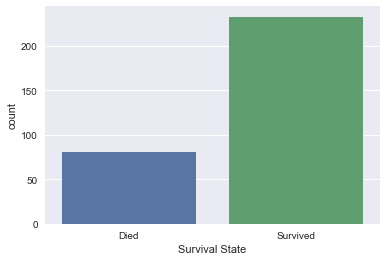

In [6]:
sns.countplot(x='Survival State', order=['Died', 'Survived'], data=df[df['Sex'] == 'female'])

The right child (male passengers) is associated with following histogram:

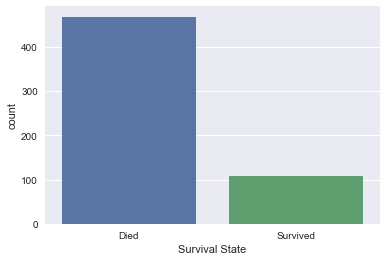

In [7]:
sns.countplot(x='Survival State', order=['Died', 'Survived'], data=df[df['Sex'] == 'male'])

Given a new observation $x'$, if we have reached to the right child of the root vertex, then we know that the probability of $x'$ belonging to Died category is 81 percent:

In [8]:
total_count =  df[df['Sex'] == 'male'].shape[0]
died_count = df[(df['Sex'] == 'male') & (df['Survival State'] == 'Died')].shape[0]
probab_pct = round(died_count / total_count * 100, 2)
print('{0} percent'.format(probab_pct))

81.11 percent


## Random Forests

Simple decision trees are simple to understand, visualise and interpret but they don't generalise very well because tree have very *high variance* in their predictions. High variance means that the probability of predicting the wrong class label is very high. For instance, assume that we randomly split our training set into two halves $X_1$ and $X_2$. A decision tree based on $X_1$ can predict a completely different class label than another decision tree learned using $X_2$ for an unseen observation $x'$.

Prediction accuracy can be improved by training multiple decision trees and averaging their results to get a single prediction. A technique to reduce the variance is called *Bootstrap aggregating* commenly known as *bagging*. *Random forest* builds upon bagging technique. 